# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
random_weather_data_file = "./Resources/weather_random_cities.csv"
weatherapi_data_file = "./Resources/API_random_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(lng_range)
print(lat_range)

(-180, 180)
(-90, 90)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
URLs = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
WPy = {}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
for city in cities:
    query_url = f'{url}&APPID={api_key}&q={city}&units={units}'
    URLs.append(query_url)
    print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        city = weather_json["name"]
        City.append(city)
        max_temp = weather_json["main"]["temp_max"]
        Max_Temp.append(max_temp)
        country = weather_json["sys"]["country"]
        Country.append(country)
        date = weather_json["dt"]
        Date.append(date)
        humidity = weather_json["main"]["humidity"]
        Humidity.append(humidity)
        lat = weather_json["coord"]["lat"]
        Lat.append(lat)
        lng = weather_json["coord"]["lon"]
        Lng.append(lng)
        cloudiness = weather_json["clouds"]["all"]
        Cloudiness.append(cloudiness)
        wind_speed = weather_json["wind"]["speed"]
        Wind_Speed.append(wind_speed)
    except KeyError:
        print(f"{city} doesn't exist in the list.")  


http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=maldonado&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=tutoia&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=svolvaer&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=punta arenas&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=qaanaaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=srednekolymsk&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=taolanaro&units=imperial
taolanaro doesn't exist in the list.
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=provideniya&units=imperial
http://api.openweathermap.org/data/2.5/weather?&

http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=thompson&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=esperance&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=cape town&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=jamestown&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=kaitangata&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=coquimbo&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=nantucket&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=pa

http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=la ronge&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=brownwood&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=qasigiannguit&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=jumla&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=garissa&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=teguise&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=severo-kurilsk&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=castro&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=ki

http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=mackay&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=ola&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=dicabisagan&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=monterrey&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=iqaluit&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=cockburn town&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=gorno-chuyskiy&units=imperial
gorno-chuyskiy doesn't exist in the list.
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=taganak&units=imperial
http://api.openweathermap.org/data/2.5/weather?&

http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=black river&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=artesia&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=natal&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=manokwari&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=comodoro rivadavia&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=avarua&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=kropotkin&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=vanimo&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=

http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=mayo&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=rabo de peixe&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=lavrentiya&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=laizhou&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=panguipulli&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=tungkang&units=imperial
tungkang doesn't exist in the list.
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=teya&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=waipawa&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783

yingzhong doesn't exist in the list.
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=redwater&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=tuatapere&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=vostok&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=mehamn&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=kadom&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=juba&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=imbituba&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=qianan&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda04856944

http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=yelizovo&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=fare&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=tambura&units=imperial
tambura doesn't exist in the list.
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=guekedou&units=imperial
guekedou doesn't exist in the list.
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=uba&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=parauna&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=novopokrovka&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=tessalit&units=imperial
http://api.openweathermap.org/da

bairiki doesn't exist in the list.
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=igurusi&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=sur&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=nampula&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=constitucion&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=sol-iletsk&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=inhambane&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=hailey&units=imperial
http://api.openweathermap.org/data/2.5/weather?&APPID=924783bda048569443e49dd6a03e5591&q=tartus&units=imperial
tartus doesn't exist in the list.
http://api.openweathermap.org/d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
WPy = {"City": City , "Cloudiness": Cloudiness, "Country": Country , "Date": Date , "Humidity": Humidity,\
       "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, "Wind Speed": Wind_Speed}
weather_df = pd.DataFrame(WPy)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Maldonado,0,UY,1554537600,93,-34.91,-54.96,50.00,2.24
1,Tutoia,92,BR,1554540702,100,-2.76,-42.27,73.51,4.07
2,Svolvaer,0,NO,1554540436,55,68.23,14.57,39.99,3.36
3,Punta Arenas,75,CL,1554540156,80,-53.16,-70.91,39.20,26.40
4,Qaanaaq,0,GL,1554540703,78,77.48,-69.36,-4.71,9.22


In [7]:
weather_df.to_csv(random_weather_data_file, index=False)

In [8]:
weatherapi_dict = {"Weather API URL": URLs}
weatherapi_df = pd.DataFrame(weatherapi_dict)
weatherapi_df.to_csv(weatherapi_data_file, index=False)
weatherapi_df.head()

,Weather API URL
0,http://api.openweathermap.org/data/2.5/weather...
1,http://api.openweathermap.org/data/2.5/weather...
2,http://api.openweathermap.org/data/2.5/weather...
3,http://api.openweathermap.org/data/2.5/weather...
4,http://api.openweathermap.org/data/2.5/weather...


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

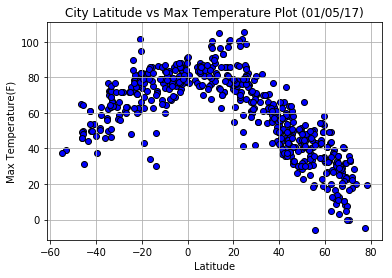

In [13]:
plt.scatter(x=Lat, y=Max_Temp,marker="o", c = "blue",edgecolor="black")
plt.title(f"City Latitude vs Max Temperature Plot (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature(F)")
plt.savefig('LatvsMaxTemp.png')
plt.grid()

#### Latitude vs. Humidity Plot

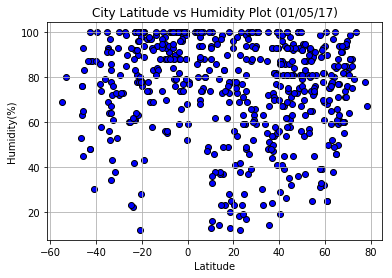

In [14]:
plt.scatter(x=Lat, y=Humidity,marker="o", c = "blue",edgecolor="black")
plt.title(f"City Latitude vs Humidity Plot (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel(f'Humidity(%)')
plt.savefig('LatvsHumidity.png')
plt.grid()

#### Latitude vs. Cloudiness Plot

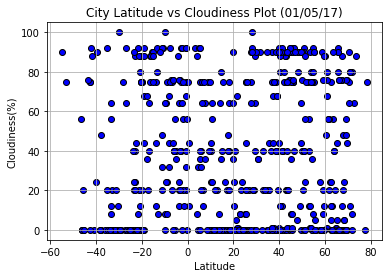

In [15]:
plt.scatter(x=Lat, y=Cloudiness,marker="o", c = "blue",edgecolor="black")
plt.title(f"City Latitude vs Cloudiness Plot (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel(f'Cloudiness(%)')
plt.savefig('LatvsCloudiness.png')
plt.grid()

#### Latitude vs. Wind Speed Plot

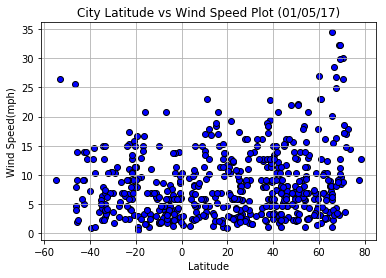

In [16]:
plt.scatter(x=Lat, y=Wind_Speed,marker="o", c = "blue",edgecolor="black")
plt.title(f"City Latitude vs Wind Speed Plot (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel(f'Wind Speed(mph)')
plt.savefig('LatvsWindSpeed.png')
plt.grid()